In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def plot_int(x, par, quantile1, quantile2):
    if not x.values.var() < 10**-8:
        fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
        sns.kdeplot(data = x, color = 'b', zorder = 11)
        sns.histplot(data = x, color = 'cornflowerblue', ax=ax, stat = 'density', kde = True, zorder = 8)
        max_hist = np.array([h.get_height() for h in sns.kdeplot(data = x).patches]).max()
        kdeline = ax.lines[0]
        xs = kdeline.get_xdata()
        ys = kdeline.get_ydata()
        left, middle, right = np.percentile(x, [quantile1, 50, quantile2])
        ax.set_title('The median value of the parameter {} is {}'.format(par, np.round(np.median(x), 4)))
        ax.vlines(np.median(x), 0, np.interp(np.median(x), xs, ys), color = 'black', linestyle = '--', zorder = 9)
        sns.histplot(x, stat='density', color = 'cornflowerblue')
        ax.fill_between(xs, 0, ys, where=(xs >= right), interpolate=True, facecolor='silver', zorder = 10)
        ax.fill_between(xs, 0, ys, where=(xs <= left), interpolate=True, facecolor='silver', zorder = 10)
        ax.fill_between(xs, ys, max_hist, where=(xs < left), interpolate=True, facecolor='white', zorder = 10)
        ax.fill_between(xs, ys, max_hist, where=(xs > right), interpolate=True, facecolor='white', zorder = 10)
        ax.set_ylim(ymin=0)
        plt.grid(False)
        plt.legend([])
        plt.show()
    else:
        print('Variance is close to zero; plot of {} is not produced'.format(par))

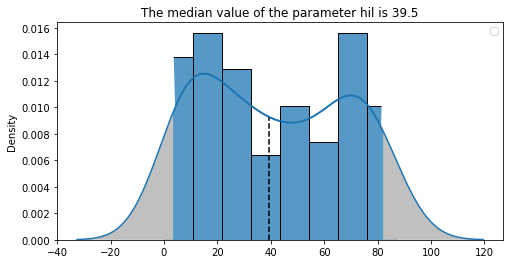

In [17]:
ages = pd.DataFrame(np.random.randint(0, 90, 100))
plot_int(ages, 'hil', 5, 95)